58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
📦 Extracting train features...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━

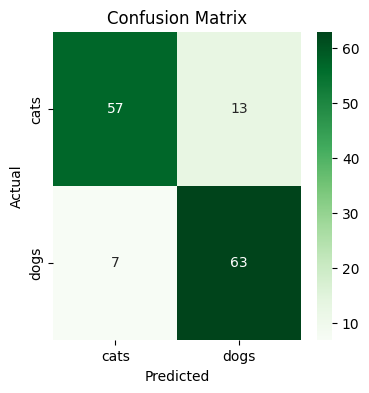

In [ ]:
# 🐱🐶 Cats vs Dogs Classification using VGG16 features + SVM

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

# === CONFIG ===
base_dir = r'/content/drive/MyDrive/ml tasks prodigy/task 3/archive_(5)'
image_size = (128, 128)  # VGG16 default
categories = ['cats', 'dogs']

# === Load VGG16 Model ===
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

def extract_features(path):
    features, labels = [], []
    for label, category in enumerate(categories):
        folder_path = os.path.join(path, category)
        for file in os.listdir(folder_path):
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(folder_path, file)
                try:
                    img = load_img(img_path, target_size=image_size)
                    img_array = img_to_array(img)
                    img_array = np.expand_dims(img_array, axis=0)
                    img_array = preprocess_input(img_array)

                    feature = vgg_model.predict(img_array)
                    features.append(feature.flatten())
                    labels.append(label)
                except Exception as e:
                    print(f"❌ Error processing {img_path}: {e}")
    return np.array(features), np.array(labels)

# === Extract Features from Train and Test sets ===
print("📦 Extracting train features...")
X_train, y_train = extract_features(os.path.join(base_dir, 'train'))

print("📦 Extracting test features...")
X_test, y_test = extract_features(os.path.join(base_dir, 'test'))

# === Train SVM ===
print("🎯 Training SVM...")
model = SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)

# === Predict and Evaluate ===
print("🔍 Evaluating...")
y_pred = model.predict(X_test)
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Cat', 'Dog']))

# === Confusion Matrix ===
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            cmap='Greens', xticklabels=categories, yticklabels=categories)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
